# Проект Аналитика в Яндекс.Афише

## Описание проекта
*Яндекс.Афиша предоставила нам данные о посещениях сайта, заказах за этот период и статистику рекламных расходов. В данной работе мы проанализируем статистику распределения посещения сайта, проводимого на нем времени. С помощью когортного анализа посчитаем удержание пользователей, прибыль. Исследуем маркетинговые действия, проанализируем каждый источник*
_____
### Данное исследование разделим на несколько частей
#### Часть 1. Изучение общей информации:
* <a href="#1.1">[1. Импортирование библиотек.]</a>
* <a href="#1.2">[2. Изучаем предоставленные данные.]</a>
* <a href="#1.3">[3. Подготавливаем данные для дальнейшего анализа.]</a>

#### Часть2.1 Исследовательский анализ данных. Посещения:
* <a href="#2.1.1">[1. Количество пользователей за различные промежутки времени.]</a>
* <a href="#2.1.2">[2. Длительность сессий.]</a>
* <a href="#2.1.3">[3. Среднее количество сессий в день на пользователя.]</a>
* <a href="#2.1.4">[4. Когортный анализ удержания пользователей.]</a>
  
#### Часть2.2 Исследовательский анализ данных. Продажи:
* <a href="#2.2.1">[1. Время, которое требуется пользователю, для совершнения первой покупки.]</a>
* <a href="#2.2.2">[2. Количество покупок с каждого устройства по месяцам.]</a>
* <a href="#2.2.5">[3. Среднее число покупок на клиента]</a>
* <a href="#2.2.3">[4. Прибыль от каждой когорты.]
* <a href="#2.2.4">[5. LTV of client.]</a>

#### Часть2.3. Исследовательский анализ данных. Маркетинг
* <a href="#2.3.1">[1. Затраты на маркетинг.]</a>
* <a href="#2.3.2">[2. Считаем CAC и ROMI по каждому источнику]</a>
  
#### Часть 3. Вывод проекта:
* <a href="#3">[1. Вывод проекта.]</a>

## Часть 1. Изучение общей информации
### Импортирование библиотек<a name="1.1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Изучаем предоставленные данные <a name="1.2"></a>

In [2]:
visits_log=pd.read_csv('/datasets/visits_log.csv')
orders_log=pd.read_csv('/datasets/orders_log.csv')
costs=pd.read_csv('/datasets/costs.csv')


In [3]:
visits_log.info()
print()
visits_log.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB



,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
orders_log.info()
print()
orders_log.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB



,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [5]:
costs.info()
print()
costs.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB



,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


В таблицах order_log и visits_log исправим названия столбцов, перейдем в них к нижнему регистру, исправим пробелы на _ . Поменяем тип данных для uid на str, все временные столбцы переведем в типо datetime64

### Подготавливаем данные для дальнейшего анализа <a name="1.3"></a>

In [6]:
orders_log.columns=orders_log.columns.str.lower().str.replace(' ','_')
visits_log.columns=visits_log.columns.str.lower().str.replace(' ','_')

In [7]:
visits_log.head(5)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [8]:
orders_log.head(5)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [9]:
visits_log[['end_ts','start_ts']]=visits_log[['end_ts','start_ts']].apply(pd.to_datetime)
visits_log['uid']=visits_log['uid'].astype('str')

In [10]:
orders_log['buy_ts']=pd.to_datetime(orders_log['buy_ts'])
orders_log['uid']=orders_log['uid'].astype('str')

In [11]:
costs['dt']=pd.to_datetime(costs['dt'])

Данные готовы для анализа, продолжим их изучение.

## Часть2.1 Исследовательский анализ данных. Посещения
### Количество пользователей за различные промежутки времени
<a name="2.1.1"></a>

Посмотрим количество пользователей за различные промежутки времени. Для этого выделим месяца, недели, даты начала и конца сессий, номера и название дней недели.

In [12]:
visits_an=visits_log.copy()
visits_an['start_ts_year']=visits_an['start_ts'].dt.year
visits_an['start_ts_month']=visits_an['start_ts'].astype('datetime64[M]')
visits_an['start_ts_week']=visits_an['start_ts'].dt.week
visits_an['start_ts_date']=visits_an['start_ts'].dt.date
visits_an['end_ts_date']=visits_an['end_ts'].dt.date
visits_an['start_ts_dayofw']=visits_an['start_ts'].dt.dayofweek
visits_an['start_ts_day_name']=visits_an['start_ts'].dt.day_name()
visits_an['start_ts_date']=pd.to_datetime(visits_an['start_ts_date'])
visits_an['end_ts_date']=pd.to_datetime(visits_an['end_ts_date'])

In [13]:
visits_an.head(5)

,device,end_ts,source_id,start_ts,uid,start_ts_year,start_ts_month,start_ts_week,start_ts_date,end_ts_date,start_ts_dayofw,start_ts_day_name
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,2017-12-20,2,Wednesday
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,2018-02-19,0,Monday
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,2017-07-01,5,Saturday
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,2018-05-20,6,Sunday
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27,2017-12-27,2,Wednesday


Посмотрим, сколько людей пользуется за различные промежутки времени в среднем, для этого напишем функцию подсчета среднего и применим ее в цикле.

In [14]:
def func_count_mean(data,column,name):
    data=data.groupby(column).agg({'uid':'nunique'})
    print('Среднее число пользователей, пользующихся приложением в',name,int(data.mean()))
col=[['start_ts_year','start_ts_month'],['start_ts_year','start_ts_week'],'start_ts_date']
name=['месяц:','неделю:','день:']
for row in col:
    func_count_mean(visits_an,row,name[0])
    del name[0]

Среднее число пользователей, пользующихся приложением в месяц: 23228
Среднее число пользователей, пользующихся приложением в неделю: 5716
Среднее число пользователей, пользующихся приложением в день: 907


Построим количество уникальных пользователей в каждом месяце.

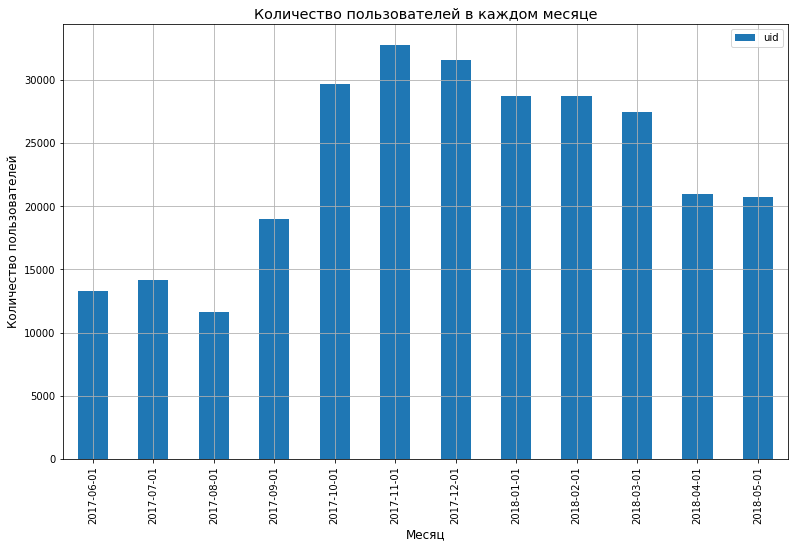

In [15]:
l=visits_an.copy()
l['start_ts_month']=l['start_ts_month'].astype('str')
l.groupby('start_ts_month').agg({'uid':'nunique'}).plot(kind='bar',figsize=(13,8));
plt.xlabel('Месяц',fontsize='large');
plt.grid()
plt.ylabel('Количество пользователей',fontsize='large');
plt.title('Количество пользователей в каждом месяце',fontsize='x-large');
del l

Видим, что в конце 2017 года удалось увеличить количество уникальных пользователей в два раза, однако с каждым месяцем это число падает.

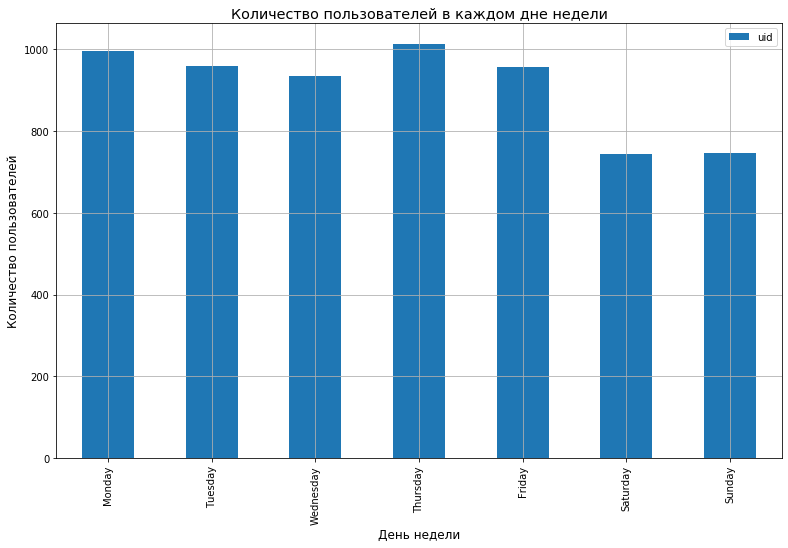

In [16]:
visits_an.groupby(['start_ts_date','start_ts_day_name','start_ts_dayofw']).agg({'uid':
                    'nunique'}).groupby(['start_ts_day_name','start_ts_dayofw']).agg({'uid':
                    'mean'}).sort_values('start_ts_dayofw').reset_index().plot.bar(x='start_ts_day_name',y='uid',figsize=(13,8));
plt.xlabel('День недели',fontsize='large');
plt.grid()
plt.ylabel('Количество пользователей',fontsize='large');
plt.title('Количество пользователей в каждом дне недели',fontsize='x-large');


Заметим, что в выходные сервисом пользуются немного меньше. Посчитаем среднее количество сессий в день

In [17]:
ses_per_day=visits_an.groupby('start_ts_date').agg({'start_ts':'count'})
print('Среднее количество сессий в день: ',int(ses_per_day.mean()))
ses_per_day

Среднее количество сессий в день:  987


,start_ts
start_ts_date,
2017-06-01,664
2017-06-02,658
2017-06-03,477
2017-06-04,510
2017-06-05,893
...,...
2018-05-27,672
2018-05-28,1156
2018-05-29,1035


### Длительность сессий <a name="2.1.2"></a>
Посмотрим длительность сессий, построим гистограмму распределения и boxplot

In [18]:
visits_an['session_duration']=visits_an['end_ts']-visits_an['start_ts']

In [19]:
visits_an.head(5)


,device,end_ts,source_id,start_ts,uid,start_ts_year,start_ts_month,start_ts_week,start_ts_date,end_ts_date,start_ts_dayofw,start_ts_day_name,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,2017-12-20,2,Wednesday,00:18:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,2018-02-19,0,Monday,00:28:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,2017-07-01,5,Saturday,00:00:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,2018-05-20,6,Sunday,00:24:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27,2017-12-27,2,Wednesday,00:00:00


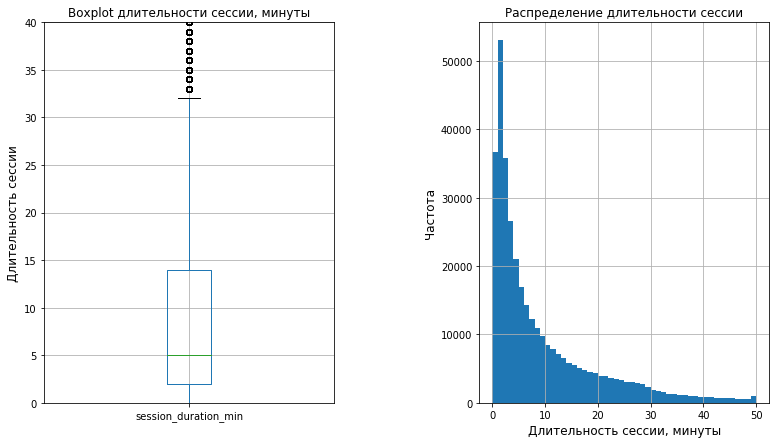

In [20]:
visits_an['session_duration_min']=visits_an['session_duration']/np.timedelta64(1,'m')
plt.figure(figsize=(13,7))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
visits_an['session_duration_min'].plot.box();
plt.ylim(0,40)
plt.grid()
plt.ylabel('Длительность сессии',fontsize='large');
plt.title('Boxplot длительности сессии, минуты',fontsize='large');
plt.subplot(1,2,2)
visits_an['session_duration_min'].hist(range=(0,50),bins=50);
plt.xlabel('Длительность сессии, минуты',fontsize='large');
plt.ylabel('Частота',fontsize='large');
plt.title('Распределение длительности сессии',fontsize='large');

In [21]:
print('Среднее:',visits_an['session_duration'].mean())
print('Медиана:', visits_an['session_duration'].median())

Среднее: 0 days 00:10:43.025687
Медиана: 0 days 00:05:00


Видим, что большинство сессий длится меньше 14 минут. Для сервиса по продажам билетов это хорошее значение. Пользователи успевают и полистать главную страницу и совершить покупку.

### Среднее количество сессий в день на пользователя <a name="2.1.3"></a>

Посчитаем среднееколичество сессий в день на пользователя

In [22]:
month_act=visits_an.groupby(['start_ts_month','start_ts_date']).agg({'uid':['count','nunique']}).reset_index()
month_act['ses_per_user']=month_act['uid']['count']/month_act['uid']['nunique']
month_act['ses_per_user'].describe()

count    364.000000
mean       1.082170
std        0.020876
min        1.000000
25%        1.070321
50%        1.082488
75%        1.093876
max        1.217837
Name: ses_per_user, dtype: float64

В среднем количество сессий в день равно количеству пользователей. Значит пользователи редко возвращаются для повторных сессий. Это, конечно, не очень хорошо, но с учетом специфики сайта, предсказуемо.

### Когортный анализ удержания пользователей <a name="2.1.4"></a>

Изучим, как часто пользователи "возвращаются". Для этого разделим пользователей на когорты

In [23]:
first_activity_date=visits_an.groupby('uid')['start_ts_date'].min()
first_activity_date.name='first_activity_date'
visits_an=visits_an.join(first_activity_date,on='uid')
first_activity_date=visits_an.groupby('uid')['start_ts'].min()
first_activity_date.name='first_activity_date_time'
visits_an=visits_an.join(first_activity_date,on='uid')
visits_an.head(5)

,device,end_ts,source_id,start_ts,uid,start_ts_year,start_ts_month,start_ts_week,start_ts_date,end_ts_date,start_ts_dayofw,start_ts_day_name,session_duration,session_duration_min,first_activity_date,first_activity_date_time
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,2017-12-20,2,Wednesday,00:18:00,18.0,2017-12-20,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,2018-02-19,0,Monday,00:28:00,28.0,2018-02-19,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,2017-07-01,5,Saturday,00:00:00,0.0,2017-07-01,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,2018-05-20,6,Sunday,00:24:00,24.0,2018-03-09,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27,2017-12-27,2,Wednesday,00:00:00,0.0,2017-12-27,2017-12-27 14:06:00


Теперь посчитаем для каждой когорты ее время жизни и количество пользователей на данном периоде.

In [24]:
visits_an['cohort_lifetime'] = visits_an['start_ts_date'] - visits_an['first_activity_date']
visits_an['cohort_lifetime'] = visits_an['cohort_lifetime'] / np.timedelta64(1,'M')
visits_an['cohort_lifetime'] = visits_an['cohort_lifetime'].astype('int')
visits_an['first_activity_month']=visits_an['first_activity_date'].astype('datetime64[M]')
cohorts=visits_an.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,778
2,2017-06-01,2,740
3,2017-06-01,3,890
4,2017-06-01,4,898
...,...,...,...
73,2018-03-01,1,644
74,2018-03-01,2,302
75,2018-04-01,0,15709
76,2018-04-01,1,313


Выделим в отдельную таблицу начально количество пользователей каждой когорты.

In [25]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
print(initial_users_count)

   first_activity_month    uid
0            2017-06-01  13259
12           2017-07-01  13140
23           2017-08-01  10181
33           2017-09-01  16704
42           2017-10-01  25977
50           2017-11-01  27248
57           2017-12-01  25268
63           2018-01-01  22624
68           2018-02-01  22197
72           2018-03-01  20589
75           2018-04-01  15709
77           2018-05-01  15273


Соединим таблицу, с пользователями на каждом периоде жизни с количеством пользователей этой когорты и посчитаем User Retention.
<a name="tabl_ud"></a>  

In [26]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on='first_activity_month') 
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
cohorts['first_activity_month']=cohorts['first_activity_month'].astype('str')
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
cohorts['first_activity_month']=cohorts['first_activity_month'].astype('datetime64[M]')

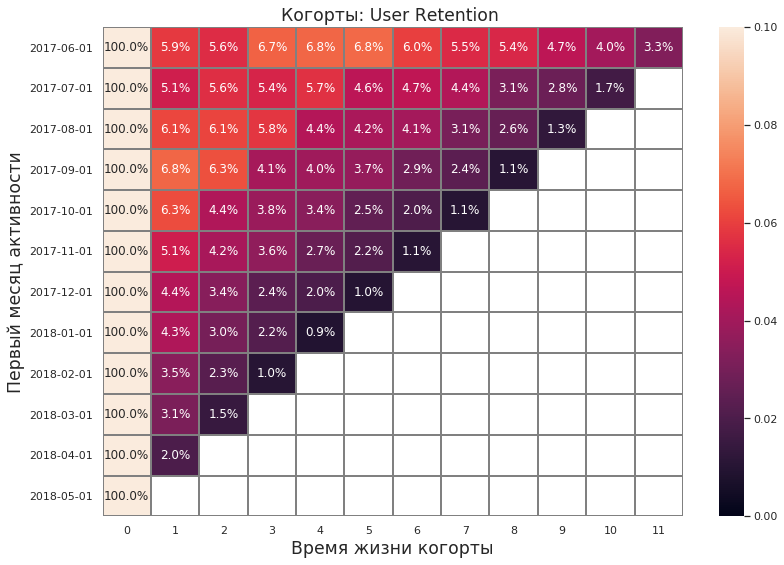

In [27]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray',vmin=0,vmax=0.1);
plt.xlabel('Время жизни когорты',fontsize='x-large');
plt.ylabel('Первый месяц активности',fontsize='x-large');
plt.title('Когорты: User Retention ',fontsize='x-large');

Как мы можем видить из таблицы, удержание пользователей не превышает 7%. Очень много пользователей так и не возвращаются на сайт. Я посоветовал бы поднять эти значения (например использование таргетинга на пользователей, которые уже посещали сайт).  
<a href="#3">К выводу</a>

## Часть2.2 Исследовательский анализ данных. Продажи
### Время, которое требуется пользователю, для совершнения первой покупки
<a name="2.2.1"></a>

Посчитаем количество дней, которое требуется пользователям, для совершения первой покупки. Для каждого пользователя посчитаем дату первой покупки и дату первого посещения сайта. 

In [28]:
orders_log

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [29]:
orders_log['uid'].nunique()

36523

In [30]:
orders_log['buy_ts_date']=orders_log['buy_ts'].dt.date
orders_log['buy_ts_date']=pd.to_datetime(orders_log['buy_ts_date'])

In [31]:
combined_log=visits_an.merge(orders_log,left_on=['end_ts_date','uid'], right_on=['buy_ts_date','uid'])

In [32]:
combined_log.head(5)

,device,end_ts,source_id,start_ts,uid,start_ts_year,start_ts_month,start_ts_week,start_ts_date,end_ts_date,...,start_ts_day_name,session_duration,session_duration_min,first_activity_date,first_activity_date_time,cohort_lifetime,first_activity_month,buy_ts,revenue,buy_ts_date
0,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,2018,2018-02-01,7,2018-02-12,2018-02-12,...,Monday,01:06:00,66.0,2018-02-10,2018-02-10 12:17:00,0,2018-02-01,2018-02-12 19:48:00,0.73,2018-02-12
1,desktop,2018-03-12 23:25:00,3,2018-03-12 23:13:00,15857957287537270437,2018,2018-03-01,11,2018-03-12,2018-03-12,...,Monday,00:12:00,12.0,2017-09-22,2017-09-22 21:16:00,5,2017-09-01,2018-03-12 23:17:00,1.83,2018-03-12
2,touch,2018-03-27 17:52:00,5,2018-03-27 17:32:00,15868686231870595097,2018,2018-03-01,13,2018-03-27,2018-03-27,...,Tuesday,00:20:00,20.0,2018-03-27,2018-03-27 16:18:00,0,2018-03-01,2018-03-27 19:45:00,1.95,2018-03-27
3,touch,2018-03-27 19:45:00,1,2018-03-27 19:44:00,15868686231870595097,2018,2018-03-01,13,2018-03-27,2018-03-27,...,Tuesday,00:01:00,1.0,2018-03-27,2018-03-27 16:18:00,0,2018-03-01,2018-03-27 19:45:00,1.95,2018-03-27
4,touch,2018-03-27 17:26:00,5,2018-03-27 17:01:00,15868686231870595097,2018,2018-03-01,13,2018-03-27,2018-03-27,...,Tuesday,00:25:00,25.0,2018-03-27,2018-03-27 16:18:00,0,2018-03-01,2018-03-27 19:45:00,1.95,2018-03-27


In [33]:
first_buy_log=orders_log.groupby('uid').agg({'buy_ts_date':'min'})
first_buy_log=first_buy_log.rename(columns={'buy_ts_date':'first_buy'})
first_buy_log=first_buy_log.merge(combined_log.loc[:,['uid','first_activity_date']],on='uid')
first_buy_log=first_buy_log.drop_duplicates()
first_buy_log.head(5)

,uid,first_buy,first_activity_date
0,10000837700716403746,2017-06-21,2017-06-08
1,10000997030965831953,2018-01-19,2018-01-19
2,10001199569370567060,2017-11-25,2017-11-25
4,10002243978166172255,2017-10-15,2017-10-15
9,10003351403065971701,2017-11-20,2017-11-20


In [34]:
first_buy_log['time_for_purchase']=(first_buy_log['first_buy']-first_buy_log['first_activity_date'])/np.timedelta64(1,'D')
print('Количество пользователей, которые произвели покупку  в первый день:', first_buy_log.loc[(first_buy_log['time_for_purchase']==0),'uid'].count())

Количество пользователей, которые произвели покупку  в первый день: 24927


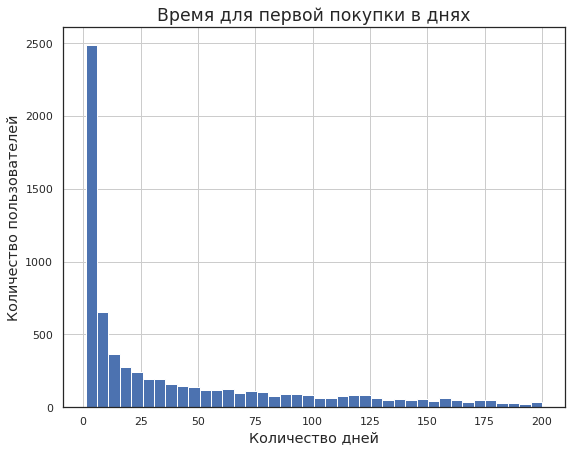

In [35]:
first_buy_log['time_for_purchase'].hist(range=(1,200),bins=40,grid=True,figsize=(9,7));
plt.xlabel('Количество дней',fontsize='large');
plt.ylabel('Количество пользователей',fontsize='large');
plt.title('Время для первой покупки в днях',fontsize='x-large');

Из подсчетов и на гистограмме мы можем наблюдать, что большая часть пользователей совершает покупку в первый же день. Очень мало людей возвращается позже и совершает покупку. Теперь посмотрим распределение в минутах
<a name="graph_min"></a>

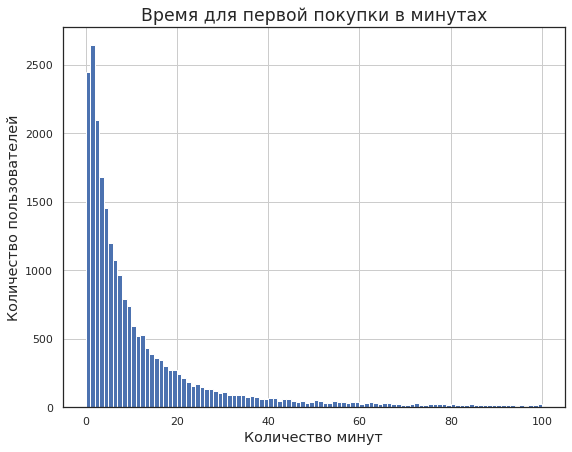

In [36]:
first_buy_log_min=orders_log.groupby('uid').agg({'buy_ts':'min'})
first_buy_log_min=first_buy_log_min.rename(columns={'buy_ts':'first_buy_time'})
first_buy_log_min=first_buy_log_min.merge(combined_log.loc[:,['uid','first_activity_date_time']],on='uid')
first_buy_log_min=first_buy_log_min.drop_duplicates()

first_buy_log_min['time_for_purchase']=(first_buy_log_min['first_buy_time']-\
                                        first_buy_log_min['first_activity_date_time'])/np.timedelta64(1,'m')

first_buy_log_min['time_for_purchase'].hist(range=(0,100),bins=100,grid=True,figsize=(9,7));


plt.xlabel('Количество минут',fontsize='large');
plt.ylabel('Количество пользователей',fontsize='large');
plt.title('Время для первой покупки в минутах',fontsize='x-large');


Большинсво пользователей совершают покупку в первые 10 минут посещения сайта. Скорее всего они приходят уже с определенным намерением купить билет на какое-то мероприятие, либо их перенаправляют с какого-то стороннего источника сразу на покупку  
<a href="#3">К выводу</a>

### Количество покупок с каждого устройства по месяцам
<a name="2.2.2"></a>

Посмотрим, с каких устройств заходит основная аудитория:

In [37]:
combined_log.groupby(['start_ts_month','device']).agg({'buy_ts':'count'})

buy_ts
start_ts_month device         
2017-06-01     desktop    2302
               touch       388
2017-07-01     desktop    2093
               touch       505
2017-08-01     desktop    1617
               touch       313
2017-09-01     desktop    3067
               touch       576
2017-10-01     desktop    5072
               touch      1021
2017-11-01     desktop    5279
               touch      1114
2017-12-01     desktop    5568
               touch      1136
2018-01-01     desktop    4021
               touch       920
2018-02-01     desktop    4721
               touch      1023
2018-03-01     desktop    4848
               touch      1031
2018-04-01     desktop    2905
               touch       515
2018-05-01     desktop    4282
               touch       742

Большинство пользователей заходит с компьютеров. Скорее всего, потому что оплата и просмотр сайта с компьютера намного удобнее. Можно попробовать увеличить удобство просмотра сайта и оптимизировать покупку для телефонов.

### Среднее число покупок на клиента <a name="2.2.5"></a>
Посчитаем среднее число покупок на 1 клиента по каждой когорте

In [38]:
sources = visits_log.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first'})
payers = orders_log.groupby('uid').agg({'buy_ts': 'min'}).merge(sources, on = 'uid').reset_index()
payers = payers.rename(columns = {'buy_ts': 'first_buy'})
ltv = payers.merge(orders_log, on = 'uid') #создадим таблицу ltv, она понадобится нам дальше
ltv['lifetime'] = ((ltv['buy_ts'] - ltv['first_buy']) / np.timedelta64(1,'M')).round().astype(int)
orders_lifetime = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'uid', aggfunc = 'count').fillna(0)
buyers_lifetime = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'uid', aggfunc = 'nunique').fillna(0)
display(buyers_lifetime)
display(orders_lifetime)
orders_per_buyer=orders_lifetime.sum(axis=1)/buyers_lifetime.sum(axis=1)
orders_per_buyer.round(2)

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,2899.0,110.0,92.0,59.0,57.0,39.0,45.0,33.0,23.0,14.0,15.0,10.0,6.0
2,3506.0,159.0,132.0,99.0,88.0,75.0,55.0,36.0,29.0,17.0,18.0,9.0,5.0
3,10473.0,286.0,227.0,149.0,111.0,86.0,87.0,59.0,45.0,14.0,15.0,8.0,8.0
4,10296.0,272.0,189.0,153.0,110.0,85.0,79.0,40.0,37.0,23.0,12.0,7.0,5.0
5,6931.0,175.0,124.0,79.0,79.0,59.0,47.0,34.0,25.0,19.0,7.0,6.0,2.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1088.0,68.0,52.0,45.0,37.0,27.0,23.0,11.0,13.0,8.0,3.0,0.0,0.0
10,1329.0,26.0,12.0,19.0,6.0,2.0,7.0,5.0,4.0,1.0,0.0,0.0,0.0


lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,3498.0,284.0,247.0,242.0,189.0,140.0,185.0,137.0,109.0,86.0,62.0,34.0,10.0
2,4380.0,621.0,398.0,283.0,177.0,149.0,105.0,75.0,100.0,41.0,40.0,16.0,7.0
3,11708.0,493.0,331.0,214.0,157.0,111.0,105.0,72.0,48.0,16.0,15.0,8.0,11.0
4,11550.0,341.0,236.0,188.0,167.0,120.0,122.0,63.0,46.0,30.0,18.0,8.0,6.0
5,7956.0,283.0,245.0,196.0,153.0,145.0,142.0,119.0,80.0,60.0,16.0,9.0,2.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1272.0,81.0,59.0,69.0,46.0,39.0,34.0,16.0,19.0,9.0,3.0,0.0,0.0
10,1469.0,29.0,13.0,23.0,7.0,2.0,7.0,6.0,4.0,2.0,0.0,0.0,0.0


source_id
1     1.54
2     1.51
3     1.15
4     1.14
5     1.24
7     1.00
9     1.20
10    1.11
dtype: float64

Можем заметить, что пользователи достаточно редко совершают повторные покупки, из приведенных выше графиков, можем сделать вывод, что большинство пользователей совершают покупки и больше не заходят на сайт. Клиенты из 1 и 2 когорты покупают в среднем намного чаще.

### Прибыль от каждой когорты <a name="2.2.3"></a>

Посчитаем общую прибыль за все время жизни каждой когорты.

In [39]:
sources = visits_log.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first'})
payers = orders_log.groupby('uid').agg({'buy_ts': 'min'}).merge(sources, on = 'uid').reset_index()
payers = payers.rename(columns = {'buy_ts': 'first_buy'})
ltv = payers.merge(orders_log, on = 'uid')
ltv['lifetime'] = ((ltv['buy_ts'] - ltv['first_buy']) / np.timedelta64(1,'M')).round().astype(int)
orders_lifetime = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'revenue', aggfunc = 'count').fillna(0)
buyers_lifetime = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'uid', aggfunc = 'nunique').fillna(0)
ltv = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'revenue', aggfunc = 'sum').fillna(0)
ltv = ltv.cumsum(axis = 1)
ltv

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,17846.78,20730.27,22876.46,24750.95,26175.95,26818.89,27615.37,28604.02,29544.45,30297.05,30606.37,30942.50,31090.55
2,23737.70,28239.92,34071.03,39455.25,41721.84,43770.27,44601.29,45397.02,46178.78,46396.86,46794.56,46911.76,46923.61
3,46894.89,49529.78,50958.98,52450.34,53235.23,53648.88,53904.56,54183.84,54379.52,54433.18,54487.87,54499.75,54511.24
4,47204.71,48783.77,49959.05,50950.96,52183.86,53812.69,55004.97,55505.99,55704.86,56095.12,56655.05,56683.39,56696.83
5,34030.40,35446.46,37912.39,47385.50,49021.21,50224.35,51048.22,51670.59,52087.36,52511.13,52556.01,52622.25,52624.02
7,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22
9,4222.42,4534.12,4795.93,5090.63,5209.55,5369.92,5504.33,5577.75,5705.94,5750.05,5759.40,5759.40,5759.40
10,4205.13,4289.26,4325.49,4389.10,4407.73,4411.24,4429.19,4443.31,4446.97,4450.33,4450.33,4450.33,4450.33


Мы видим, что 3, 4, 5 источники являются самыми прибыльными, но это еще не значит, что они самые лучшие для инвестирования. Из 7 источника пришел только 1 клиент.  
<a href="#3">К выводу</a>

### LTV of client <a name="2.2.4"></a>

Изучим ltv на клиента каждой когорты <a name="ltv"></a>

In [40]:
cohort_sizes = payers.groupby('source_id').agg({'uid': 'nunique'}).rename(columns = {'uid': 'cohort_size'})
ltv = ltv.merge(cohort_sizes, on = 'source_id')
ltv = ltv.div(ltv['cohort_size'], axis = 0).drop(columns = 'cohort_size')
display(ltv.round(2))

,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,6.16,7.15,7.89,8.54,9.03,9.25,9.53,9.87,10.19,10.45,10.56,10.67,10.72
2,6.77,8.05,9.72,11.25,11.90,12.48,12.72,12.95,13.17,13.23,13.35,13.38,13.38
3,4.48,4.73,4.87,5.01,5.08,5.12,5.15,5.17,5.19,5.20,5.20,5.20,5.20
4,4.58,4.74,4.85,4.95,5.07,5.23,5.34,5.39,5.41,5.45,5.50,5.51,5.51
5,4.91,5.11,5.47,6.84,7.07,7.25,7.37,7.45,7.52,7.58,7.58,7.59,7.59
7,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22
9,3.88,4.17,4.41,4.68,4.79,4.94,5.06,5.13,5.24,5.28,5.29,5.29,5.29
10,3.16,3.23,3.25,3.30,3.32,3.32,3.33,3.34,3.35,3.35,3.35,3.35,3.35


Видим, что жизненная ценность одного клиента источников 1,2 в два раза больше 3-5. Клиенты этих источников лучше раположены к покупкам, чем пользователи из 3-5. 

Посчитаем средний чек. 


In [41]:
mean_ord=orders_log['revenue'].sum()/orders_log['uid'].count()
mean_ord
print('Средний чек: {:.2f}'.format(mean_ord))

Средний чек: 5.00


<a href="#3">К выводу</a>

## Часть2.3. Исследовательский анализ данных. Маркетинг
### Затраты на маркетинг
<a name="2.3.1"></a>

Теперь проанализируем маркетинговые затраты и их полезность.

In [42]:
costs['dt_month']=costs['dt'].astype('datetime64[M]')
print('Потрачено всего на маркетинг:',costs['costs'].sum())
costs_per_s=costs.groupby('source_id').agg({'costs':'sum'})
costs_per_s

Потрачено всего на маркетинг: 329131.62


,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


затраты на 3 источник очень сильно выделаются из остальных, неужели он настолько удачный? Посчитаем разницу затрат на маркетинг и прибыли.

In [43]:
costs_per_s=costs_per_s.merge(combined_log.groupby('source_id').agg({'revenue':'sum'}),on='source_id')
costs_per_s['delta']=costs_per_s['revenue']-costs_per_s['costs']
costs_per_s

,costs,revenue,delta
source_id,,,
1,20833.27,63041.53,42208.26
2,42806.04,69498.81,26692.77
3,141321.63,42253.23,-99068.40
4,61073.60,48418.21,-12655.39
5,51757.10,57094.67,5337.57
9,5517.49,3788.21,-1729.28
10,5822.49,4360.42,-1462.07


Из этой таблицы видно, что 3 и 4 источники крайне неудачные, да и 5,9,10 работают не самым лучшим образом. Радуют 1 и 2 источники

### Считаем CAC и ROMI по каждому источнику
<a name="2.3.2"></a>

Рассчитаем CAC для каждого источника

In [44]:
cac = costs.groupby('source_id').agg({'costs': 'sum'}).merge(cohort_sizes, on = 'source_id')
cac['cac'] = cac['costs'] / cac['cohort_size']
display(cac)

,costs,cohort_size,cac
source_id,,,
1,20833.27,2899,7.186364
2,42806.04,3506,12.209367
3,141321.63,10473,13.493901
4,61073.60,10296,5.931779
5,51757.10,6931,7.467479
9,5517.49,1088,5.071222
10,5822.49,1329,4.381106


Теперь мы можем посчитать ROI для кажого источника и построить график окупаемости

In [45]:
roi = ltv.merge(cac[['cac']], on = 'source_id')
roi = roi.div(roi['cac'], axis = 0).drop(columns = 'cac')
roi.round(2)


,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,0.86,1.00,1.10,1.19,1.26,1.29,1.33,1.37,1.42,1.45,1.47,1.49,1.49
2,0.55,0.66,0.80,0.92,0.97,1.02,1.04,1.06,1.08,1.08,1.09,1.10,1.10
3,0.33,0.35,0.36,0.37,0.38,0.38,0.38,0.38,0.38,0.39,0.39,0.39,0.39
4,0.77,0.80,0.82,0.83,0.85,0.88,0.90,0.91,0.91,0.92,0.93,0.93,0.93
5,0.66,0.68,0.73,0.92,0.95,0.97,0.99,1.00,1.01,1.01,1.02,1.02,1.02
9,0.77,0.82,0.87,0.92,0.94,0.97,1.00,1.01,1.03,1.04,1.04,1.04,1.04
10,0.72,0.74,0.74,0.75,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76


Из этих таблиц видно, что 1 и 2 источники обладают хорошей окупаемостью. 5 и 9 источник скорее работает практически в 0. В остальных источниках окупаемость является редкой, а тк пользователей возвращается мало, на выход в 0 рассчитывать не приходится. Так как окупаемость источников 5 и 9 дольше окупаемости источников 1 и 2, я советую инвестировать в них.   
Построим графики окупаемости каждого источника
<a name="roi"></a>

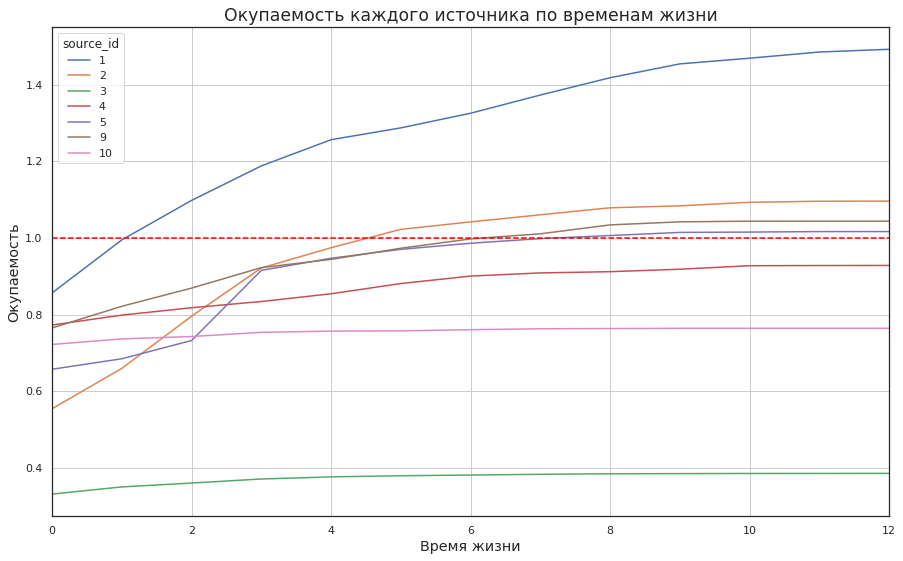

In [46]:
roi.T.plot(figsize=(15,9));
plt.grid()
plt.axhline(y=1,color='red',linestyle='--')
plt.xlabel('Время жизни',fontsize='large');
plt.ylabel('Окупаемость',fontsize='large');
plt.title('Окупаемость каждого источника по временам жизни',fontsize='x-large');

Видим, что 1 источник окупился почти сразу. Источники 10, 3, 4 так и не окупились. От них стоит точно отказаться

## Часть3. Вывод проекта
<a name="3"></a>

Мы проанализировали данные предоставленные Яндекс.Афишей. Выяснили, что в основном пользователи сервиса заходят с компьютеров, а среднее время сессии около 10 минут. Пользователи обычно совершают свои первые покупки в первый день своего пребывания на сайт  
- <a href="#graph_min">График распределения времени первой покупки</a>  

Проанализировали удержание пользователей, построили таблицу. Из таблицы видно, что пользователи редко возвращаются на сайт, и это точно надо исправить.  
- <a href="#tabl_ud">Таблица удержания пользователей</a>  

Построили таблицы прибыли по когортам, выделили самые прибыльные когорты, и когорты, с самыми ценными клиентами 
- <a href="#cog_rev">Таблица прибылей когорт</a>  
- <a href="#ltv">Таблица ltv каждого пользователя</a>   

Изучили ROI каждого маркетингового источника, выявили самые выгодные источники и те, от которых лучше отказаться
- <a href="#roi">Таблица ROMI каждого источника</a> 

### Рекомендации
Я  бы посоветовал заказчику тщательно проработать удержание клиентов. Это можно сделать с помощью таргетинга, бонусной мотивации,возможно, ввести программу лояльности. Увеличить время пребывания пользователя на сайте: ввести таргетированные новости про мир кино, концертов и тд. Полностью отказаться от рекламы в источниках 3,4,10, так как они не окупаются. Вложить больше денег в 1 и 2 источник, 5,9 не являются приоритетными(обладают долгой окупаемостьюи работают почти в 0). Попробовать лучше оптимизировать работу сервиса для телефонов